**Modified Algorithm**

We will be using the ExtraTreesClassifier when creating our new algorithm as it provided some of the better scores for different Evaluation Metrics. We will modify this algorithm when compared with the original implementation in the paper.

Changes Include:

*   Keeping all features and not dropping any.
*   Using GridSearchCV to determine the best parameters

Finally we will compare the results with all other implementations with a visual representation.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

source_file = 'hotel_bookings.csv'
data = pd.read_csv(source_file)
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [11]:
le = LabelEncoder()
data[data.select_dtypes(include = ['object']).columns] = data[data.select_dtypes(include=['object']).columns].apply(le.fit_transform)

data.company.fillna(value = 0, inplace = True)
data.agent.fillna(value = 0, inplace = True)
data.children.fillna(value = 0, inplace = True)
data.country.fillna(value = 0, inplace = True)

features = data.drop(['is_canceled'],1)
labels = data['is_canceled']
print(features.shape, labels.shape)

(119390, 31) (119390,)


<ipython-input-11-4f83abbf761c>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features = data.drop(['is_canceled'],1)


In [12]:
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print("Train Shape: ", X_train.shape)
print("Test Shape: ", X_test.shape)
print("Train Shape: ", y_train.shape)
print("Test Shape: ", y_test.shape)

Train Shape:  (83573, 31)
Test Shape:  (35817, 31)
Train Shape:  (83573,)
Test Shape:  (35817,)


In [16]:
et = ExtraTreesClassifier()

param_grid = { 
    'min_samples_leaf' : [6,7],
    'min_samples_split' : [3,4] ,
    'n_estimators' : [100, 200],
    'criterion' :['gini', 'entropy']
}

et_cv = GridSearchCV(estimator = et, param_grid = param_grid, cv = 5)
et_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [6, 7],
                         'min_samples_split': [3, 4],
                         'n_estimators': [100, 200]})

In [17]:
et_cv.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'n_estimators': 200}

In [18]:
ET = ExtraTreesClassifier(min_samples_leaf = 6, min_samples_split = 3, n_estimators = 200, criterion = 'gini')
ET.fit(X_train, y_train)
y_pred = ET.predict(X_test)

In [19]:
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1 Score: ', f1)

Accuracy:  0.9999441605941313
Recall:  0.9998512568793694
Precision:  1.0
F1 Score:  0.9999256229081444


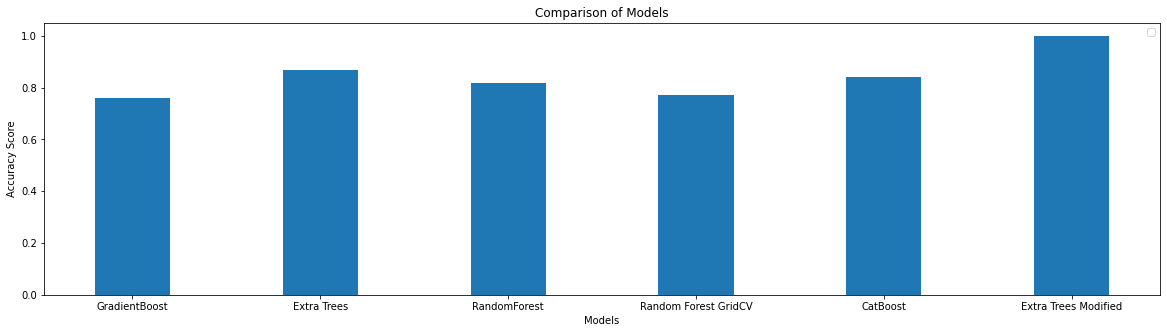

In [29]:
x = ['GradientBoost','Extra Trees','RandomForest','Random Forest GridCV','CatBoost','Extra Trees Modified']
y = [0.81,0.87,0.82,0.77,0.84,acc]
  
x_axis = np.arange(len(x))

plt.figure(figsize = (20, 5))

plt.bar(x_axis, y, 0.4)


plt.xticks(x_axis, x)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Models")
plt.legend()
plt.show()